In [54]:
import heapq
import numpy as np
import time, random, matplotlib.pyplot as plt 
import sys

# Adjacency Matrix representation in Python

class Graph(object):

    # Initialize the matrix
    def __init__(self, size):
        self.adjMatrix = []
        self.adjList = {}
        self.size = size

        # Adjacency Matrix
        for i in range(size):
            self.adjMatrix.append([float('inf') if i != j else 0 for j in range(size)])

        # Adjacency List 
        for i in range(size): 
            self.adjList[i] = []
        
    # Add edges
    def add_edge(self, v1, v2, weight):
        if v1 == v2:
            print("Same vertex {} and {}".format(v1, v2))
        elif (v1==0) | (v2==0):
            print("Please enter vertex between 1 - {}".format(self.size))
        
        # Adjacency Matrix
        self.adjMatrix[v1-1][v2-1] = weight
        
        add = 1
        # Adjacency List 
        for item in self.adjList[v1-1]:
            if item[0] == v2: 
                add = 0

        if add: 
            self.adjList[v1-1].append((v2, weight))

    # Remove edges
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between {} and {}".format(v1, v2))
        elif (v1==0) | (v2==0):
            print("Please enter vertex between 1 - {}".format(self.size))
            return
        
        # Adjacency Matrix
        self.adjMatrix[v1-1][v2-1] = float('inf')

        # Adjacency Matrix 
        self.adjList[v1].remove(v2)

    def getSize(self):
        return self.size

    # Print the matrix
    def print_matrix(self):
        for row in self.adjMatrix:
            for val in row:
                print('{:4}'.format(val), end=" "),
            print("\n")

    def print_list(self): 
        for vertex in self.adjList:
            print("{} -> ".format(vertex+1), end=" ")
            for item in self.adjList[vertex]:
                print("{}".format(item), end=" ")
            print("\n")

    # Check if graph is strongly connected
    def is_strongly_connected(self):
        # Perform DFS from each vertex
        for start in range(self.size):
            visited = [False] * self.size
            self._dfs(start, visited)

            # Check if all vertices were visited
            if not all(visited):
                return False

        return True
    
    # Helper function for DFS
    def _dfs(self, vertex, visited):
        visited[vertex] = True
        for neighbor in self.adjList[vertex]:
            if not visited[neighbor[0] - 1]:
                self._dfs(neighbor[0] - 1, visited)


class priority_queue(object): 
    def __init__(self):
        self.pq = []
        self.len = len(self.pq)

    def add(self, vertex, weight):
        if not self.pq:
            self.pq.append((vertex, weight))
            self.len += 1
            return

        # Binary Search
        low, high = 0, self.len-1

        while low <= high:
            mid = (low + high) // 2
            if self.pq[mid][1] < weight:
                low = mid + 1
            else:
                high = mid - 1

        self.pq.insert(low, (vertex, weight))
        self.len += 1

    def remove(self, vertex): 
        for v in self.pq: 
            if v[0] == vertex: 
                self.pq.remove(v)
                self.len -= 1

    def getMin(self):
        return self.pq[0]

    def printQueue(self):
        print(self.pq)



class priority_queue_heap(object):
    def __init__(self):
        self.pq = []
        self.len = len(self.pq)

    def add(self, vertex, weight):
        heapq.heappush(self.pq, (weight, vertex))
        self.len += 1

    def remove(self, vertex):
        for v in self.pq:
            if v[1] == vertex:
                self.pq.remove(v)
                self.len -= 1

    def getMin(self):
        return self.pq[0]

    def printQueue(self):
        print(self.pq)

def DijkstraAlgo_A(graph, source):
    d = []
    pi = []
    S = []
    pq = []
    
    # Initialization 
    for v in range(graph.getSize()):
        d.append(float('inf'))
        pi.append(0)
        S.append(None)
        # Push every vertex into priority queue using array
        pq.append((v, d[v]))

    # Set source node 
    d[source-1] = 0

    while len(pq):
        u = -1
        # Get minimum weight (vertex, weight)
        weight = sys.maxsize
        for index in range(len(pq)): 
            if(pq[index][1] < weight and S[u] != 1 and pq[index][1] != -1): 
                u = index
                weight = pq[index][1]
        if u == -1:
            break
        pq[u] = (pq[u][0], -1)
        S[u] = 1
        for v in range(graph.getSize()):
            w = graph.adjMatrix[u][v]
            if ((w !=0) and 
                (w != float('inf')) and S[w] != 1):

                temp_weight = weight + w

                if temp_weight < d[v]:
                    # Update weight
                    d[v] = temp_weight 
                    pq[v] = (pq[v][0],temp_weight)


    return S, d, pi
            

def DijkstraAlgo_B(graph, source):
    # use the adjacency list to find the shortest path
    d = []
    pi = []
    S = []

    for v in range(graph.getSize()): # Time Complexity = O(V)
        d.append(float('inf'))
        pi.append(0)
        S.append(None)

    d[source-1] = 0
    heap = [(0,source-1)]
    while heap:
            
            # Get minimum weight    
            dist, u = heapq.heappop(heap) # Time Complexity = O(1)
            if S[u]:
                continue
            S[u] = 1

            # For every adjacent node
            # Use BFS to traverse the graph using the adjacency list
            for v in graph.adjList[u]: # Time Complexity = O(|E| + |V|)
                if ((v[1] != 0) and (v[1] != float('inf'))
                and (d[v[0]-1] > d[u] + v[1]) and (S[v[0]-1] == None)):
                    d[v[0]-1] = d[u] + v[1] 
                    pi[v[0]-1] = u+1
                    heapq.heappush(heap,(d[v[0]-1],v[0]-1)) # Time Complexity = O(log(V))


    return S, d, pi

import random

def generate_random_graph(size):
    # Initialize graph
    graph = Graph(size)

    # Generate a random permutation of vertices
    vertices = list(range(1, size + 1))
    random.shuffle(vertices)

    # Add edges to create a random strongly connected graph
    for i in range(size):
        v1 = vertices[i]
        v2 = vertices[(i + 1) % size]
        weight = random.randint(1, 10)
        graph.add_edge(v1, v2, weight)

    # Add additional random edges to increase connectivity
    for i in range(size * 2):
        v1 = random.randint(1, size)
        v2 = random.randint(1, size)
        if v1 != v2:
            weight = random.randint(1, 10)
            graph.add_edge(v1, v2, weight)

    return graph

In [53]:
sizes = range(10, 300, 10)
runtime = []
runtime2 = []
runs = 100   

for size in sizes: 
    g = generate_random_graph(size)
    elapsed_time = 0
    elapsed_time2 = 0    
    for _ in range(runs): 
        start_time = time.time()
        DijkstraAlgo_A(g, 1)
                  # print(S, d, pi)
        elapsed_time += time.time() - start_time 
    for _ in range(runs): 
        start_time = time.time()
        DijkstraAlgo_B(g, 1)
                  # print(S, d, pi)
        elapsed_time2 += time.time() - start_time 

    print(size)
        # print("Elapsed Time: {:2}s".format(elapsed_time))
    runtime.append(elapsed_time/runs)
    runtime2.append(elapsed_time2/runs)

IndexError: list index out of range

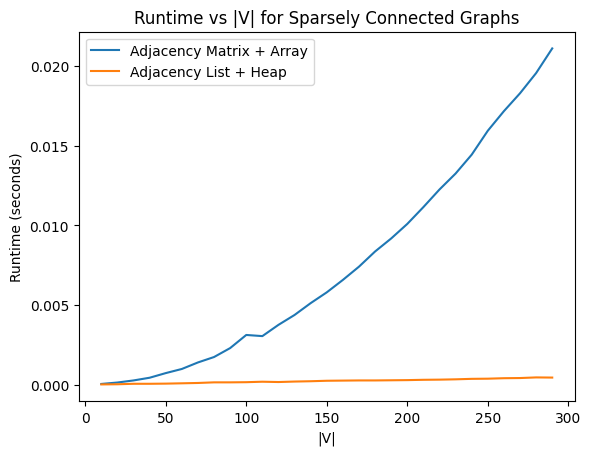

In [42]:
plt.plot(sizes, runtime, label="Adjacency Matrix + Array")
plt.plot(sizes, runtime2, label="Adjacency List + Heap")
plt.xlabel('|V|')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs |V| for Sparsely Connected Graphs')
plt.legend()
plt.show()

In [43]:
def genConnected(size):
    # Initialize graph
    graph = Graph(size)

    # Generate a random permutation of vertices
    vertices = list(range(1, size + 1))
    random.shuffle(vertices)

    # Add edges to create a random strongly connected graph
    for i in range(size):
        v1 = vertices[i]
        for j in range(size):
            if j != i:
                v2 = vertices[j]
                weight = random.randint(1, 10)
                graph.add_edge(v1, v2, weight)

    return graph

In [44]:
sizes = range(10, 300, 10)
runtime3 = []
runtime4 = []
runs = 100   

for size in sizes: 
    g = genConnected(size)
    elapsed_time = 0
    elapsed_time2 = 0    
    for _ in range(runs): 
        start_time = time.time()
        DijkstraAlgo_A(g, 1)
                  # print(S, d, pi)
        elapsed_time += time.time() - start_time 
    for _ in range(runs): 
        start_time = time.time()
        DijkstraAlgo_B(g, 1)
                  # print(S, d, pi)
        elapsed_time2 += time.time() - start_time 

    print(size)
        # print("Elapsed Time: {:2}s".format(elapsed_time))
    runtime3.append(elapsed_time/runs)
    runtime4.append(elapsed_time2/runs)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


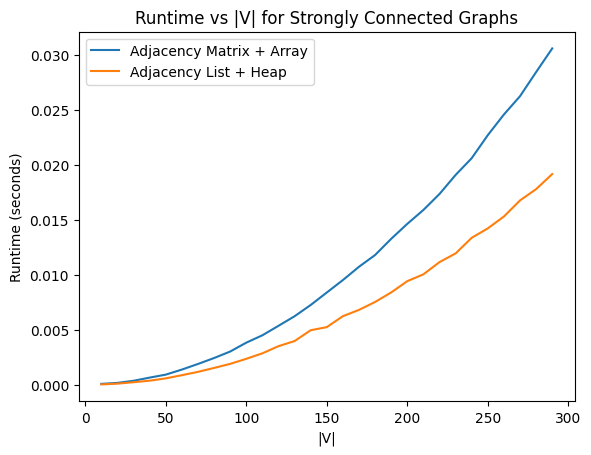

In [45]:
plt.plot(sizes, runtime3, label="Adjacency Matrix + Array")
plt.plot(sizes, runtime4, label="Adjacency List + Heap")
plt.xlabel('|V|')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime vs |V| for Strongly Connected Graphs')
plt.legend()
plt.show()